In [2]:
#Capstone Project II: Marketing Analytics 
#This data set is marketing information from a company. The ultimate goal here is to examine the customer segmentation 
#portion of people with an income equal to or over $50,000 to see the likelihood of them responding to a certain 
#marketing campaign. Furthermore, a predictive model will be created to showcase and reveal more accurately to the 
#business leaders the customers who have an income equal to or over $50,000 and the likelihood of them responding 
#to a marketing campaign. 


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import seaborn as sns
from library.sb_utils import save_file
from sklearn.cluster import KMeans

In [18]:
#"C:\Users\Mtize\Downloads\DataScienceGuidedCapstone-master\raw_data\ifood_df.csv"
#"C:\Users\Mtize\Downloads\Capstone_Project_Two\ifood_df.csv"
#ifood_data = pd.read_csv('../Capstone_Project_Two//ifood_df.csv') ; ask advisor question about this 
#print(ifood_data)

In [19]:
#ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')
ifood_data = pd.read_csv('../raw_data//ifood_df.csv')
print(ifood_data)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2           

In [20]:
ifood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [21]:
#the 0 to 2k+ are the customers who have bought things, the 39 colunms is data on them that ranges
#from income, amount of kids, preferred prodcuct, there education etc. 
ifood_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [68]:
ifood_data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [22]:
#group by products sold using sum method of purchases for columns, more quantity questions and use for problems plus 
#add visuals

In [38]:
#find how to show incomes at or higher then $50000 and show no other columns 
print(ifood_data[['Income']].to_string(index=False))

  Income
 58138.0
 46344.0
 71613.0
 26646.0
 58293.0
 62513.0
 55635.0
 33454.0
 30351.0
  5648.0
  7500.0
 63033.0
 59354.0
 17323.0
 82800.0
 41850.0
 37760.0
 76995.0
 33812.0
 37040.0
  2447.0
 58607.0
 65324.0
 40689.0
 18589.0
 53359.0
 38360.0
 84618.0
 10979.0
 38620.0
 40548.0
 46610.0
 68657.0
 49389.0
 67353.0
 23718.0
 42429.0
 48948.0
 80011.0
 20559.0
 21994.0
  7500.0
 79941.0
  7500.0
 41728.0
 72550.0
 65486.0
 79143.0
 35790.0
 82582.0
 66373.0
 82384.0
 70287.0
 27938.0
 55954.0
 75777.0
 66653.0
 61823.0
 67680.0
 70666.0
 25721.0
 32474.0
 88194.0
 69096.0
 74854.0
 66991.0
 65031.0
 60631.0
 28332.0
 40246.0
 75251.0
 75825.0
 26326.0
 56046.0
 29760.0
 26304.0
 23559.0
 38620.0
 81361.0
 29440.0
 36138.0
 50388.0
 79593.0
 54178.0
 42394.0
 23626.0
 30096.0
 47916.0
 51813.0
 78497.0
 50150.0
 47823.0
 34554.0
 85693.0
 65846.0
 87195.0
 24594.0
 49096.0
 52413.0
 38557.0
 89058.0
 77298.0
 68126.0
 57288.0
 86037.0
 43974.0
 50785.0
 90765.0
 36550.0
 30753.0
 

In [36]:
incomes_at_50k_or_higher = ifood_data[ifood_data['Income'] > 49999].T
print(incomes_at_50k_or_higher)

                         0        2        4        5        6        11    \
Income                58138.0  71613.0  58293.0  62513.0  55635.0  63033.0   
Kidhome                   0.0      0.0      1.0      0.0      0.0      0.0   
Teenhome                  0.0      0.0      0.0      1.0      1.0      0.0   
Recency                  58.0     26.0     94.0     16.0     34.0     82.0   
MntWines                635.0    426.0    173.0    520.0    235.0    194.0   
MntFruits                88.0     49.0     43.0     42.0     65.0     61.0   
MntMeatProducts         546.0    127.0    118.0     98.0    164.0    480.0   
MntFishProducts         172.0    111.0     46.0      0.0     50.0    225.0   
MntSweetProducts         88.0     21.0     27.0     42.0     49.0    112.0   
MntGoldProds             88.0     42.0     15.0     14.0     27.0     30.0   
NumDealsPurchases         3.0      1.0      5.0      2.0      4.0      1.0   
NumWebPurchases           8.0      8.0      5.0      6.0      7.

In [48]:
incomes_at_50k_or_higher2 = ifood_data.loc[ifood_data['Income'] > 49999].T
print(incomes_at_50k_or_higher2)

                         0        2        4        5        6        11    \
Income                58138.0  71613.0  58293.0  62513.0  55635.0  63033.0   
Kidhome                   0.0      0.0      1.0      0.0      0.0      0.0   
Teenhome                  0.0      0.0      0.0      1.0      1.0      0.0   
Recency                  58.0     26.0     94.0     16.0     34.0     82.0   
MntWines                635.0    426.0    173.0    520.0    235.0    194.0   
MntFruits                88.0     49.0     43.0     42.0     65.0     61.0   
MntMeatProducts         546.0    127.0    118.0     98.0    164.0    480.0   
MntFishProducts         172.0    111.0     46.0      0.0     50.0    225.0   
MntSweetProducts         88.0     21.0     27.0     42.0     49.0    112.0   
MntGoldProds             88.0     42.0     15.0     14.0     27.0     30.0   
NumDealsPurchases         3.0      1.0      5.0      2.0      4.0      1.0   
NumWebPurchases           8.0      8.0      5.0      6.0      7.

In [35]:
#find products that sold the most 
ifood_data_sum_of_products_sold_total = ['MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts', 'MntRegularProds', 'MntWines', 'MntFruits']
ifood_data['Sum'] = ifood_data[ifood_data_sum_of_products_sold_total].sum(axis=1)
print(ifood_data)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2           

In [36]:
#find what marketing channel customers bought on 
ifood_data.loc[:2205, ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].T

,0,1,2,3,4,5,6,7,8,9,...,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204
NumDealsPurchases,3,2,1,2,5,2,4,2,1,1,...,2,3,2,1,1,2,7,1,2,3
NumWebPurchases,8,1,8,2,5,6,7,4,3,1,...,2,3,9,0,1,9,8,2,6,3
NumCatalogPurchases,10,1,2,0,3,4,3,0,0,0,...,1,1,4,0,0,3,2,3,5,1
NumStorePurchases,4,2,10,4,6,10,7,4,2,0,...,2,2,12,3,2,4,5,13,10,4


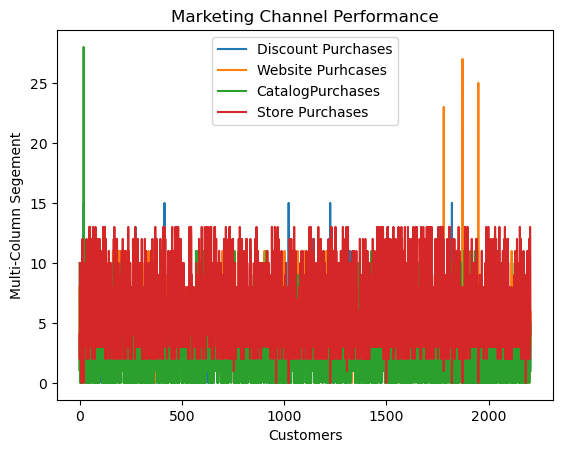

In [37]:
#confused on what to name the x and y labels, but here plotted visuals of the mediums of how people bought 
plt.plot(ifood_data['NumDealsPurchases'], label='Discount Purchases')
plt.plot(ifood_data['NumWebPurchases'], label='Website Purhcases')
plt.plot(ifood_data['NumCatalogPurchases'], label='CatalogPurchases')
plt.plot(ifood_data['NumStorePurchases'], label='Store Purchases')

plt.xlabel('Customers')
plt.ylabel('Multi-Column Segement')
plt.title('Marketing Channel Performance')

plt.legend()
plt.show()


In [38]:
#check to see if the 2204/2205 are customers still confused not sure i even used the right code to
#displaying the diff type of products sold 
ifood_data.loc[:2205, ["MntMeatProducts", "MntFishProducts", "MntGoldProds", "MntSweetProducts", "MntRegularProds", "MntWines", "MntFruits"]].T

,0,1,2,3,4,5,6,7,8,9,...,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204
MntMeatProducts,546,6,127,20,118,98,164,56,24,6,...,8,26,143,6,7,182,30,217,214,61
MntFishProducts,172,2,111,10,46,0,50,3,3,1,...,20,7,13,3,6,42,0,32,80,2
MntGoldProds,88,6,42,5,15,14,27,23,2,13,...,17,23,20,3,9,247,8,24,61,21
MntSweetProducts,88,1,21,3,27,42,49,1,3,1,...,0,1,10,4,2,118,0,12,30,1
MntRegularProds,1441,15,692,43,392,688,536,123,42,23,...,16,38,1009,16,12,847,428,1193,721,130


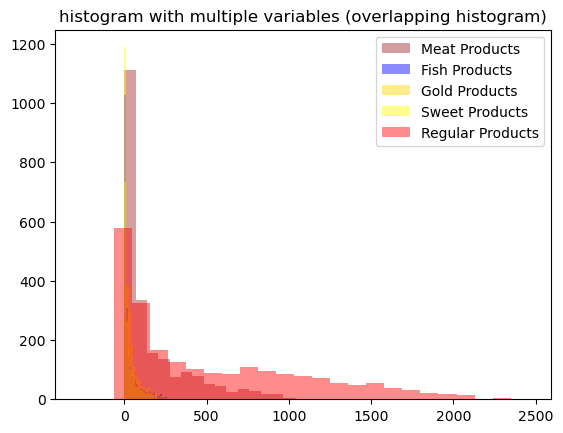

In [39]:
#observing what are the product perefences among customers 
plt.hist(ifood_data['MntMeatProducts'], bins=25, alpha=0.45, color='brown')
plt.hist(ifood_data['MntFishProducts'], bins=25, alpha=0.45, color='blue')
plt.hist(ifood_data['MntGoldProds'], bins=25, alpha=0.45, color='gold')
plt.hist(ifood_data['MntSweetProducts'], bins=25, alpha=0.45, color='yellow')
plt.hist(ifood_data['MntRegularProds'], bins=25, alpha=0.45, color='red')
plt.hist(ifood_data['MntWines'], bins=25, alpha=0.45, color='purple')
plt.hist(ifood_data['MntFruits'], bins=25, alpha=0.45, color='blue')


plt.title("histogram with multiple \
variables (overlapping histogram)")
  
plt.legend(['Meat Products', 
            'Fish Products', 'Gold Products', 'Sweet Products', 'Regular Products', 'Wine Products', 'Fruit products'])
  
plt.show()

In [40]:
#observing the campaign responses 
ifood_data.loc[:2205, ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].T


,0,1,2,3,4,5,6,7,8,9,...,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204
AcceptedCmp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
AcceptedCmp2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AcceptedCmp3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
AcceptedCmp4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AcceptedCmp5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Response,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


(array([2063.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  142.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

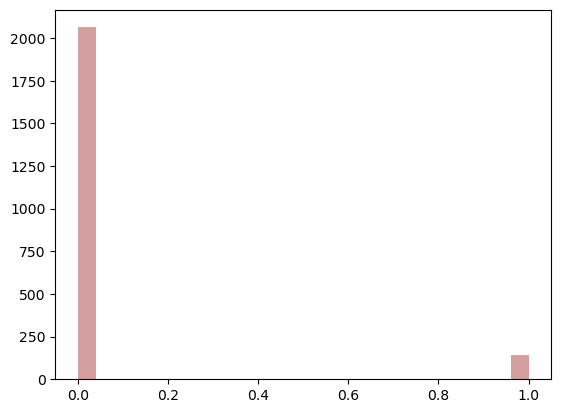

In [41]:
#keep in mind all of the following from the below reagrding campaigns 1 is person accepted offer, 0 is otherwise
#make these side by side independent histo plots 
plt.hist(ifood_data['AcceptedCmp1'], bins=25, alpha=0.45, color='brown')

(array([2175.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   30.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

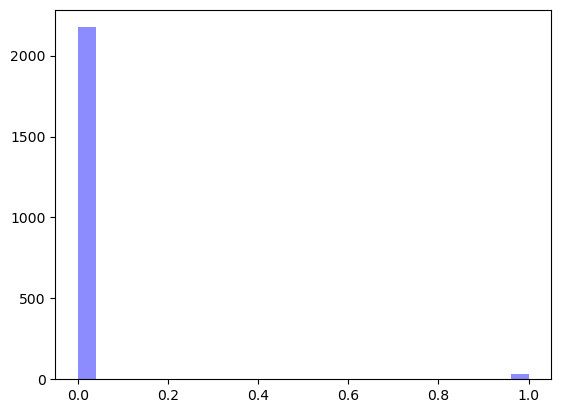

In [42]:
plt.hist(ifood_data['AcceptedCmp2'], bins=25, alpha=0.45, color='blue')

(array([2042.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  163.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

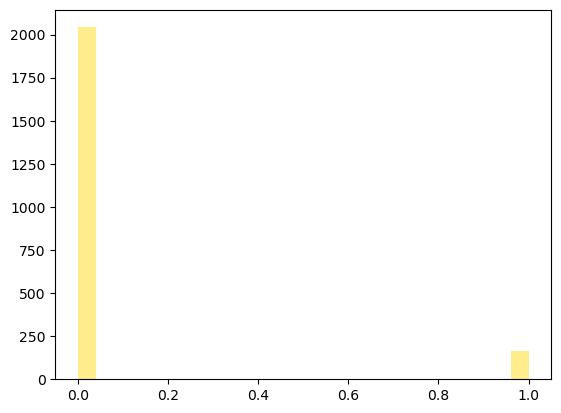

In [43]:
plt.hist(ifood_data['AcceptedCmp3'], bins=25, alpha=0.45, color='gold')

(array([2041.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  164.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

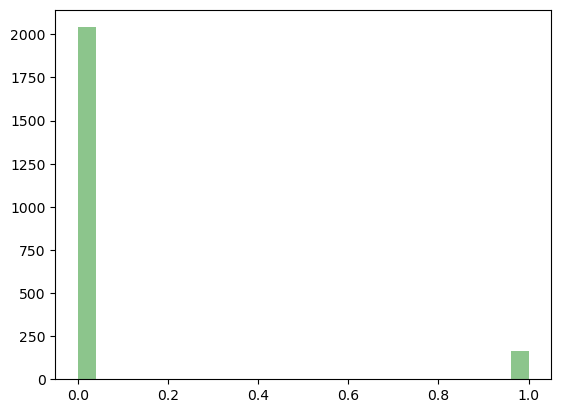

In [44]:
plt.hist(ifood_data['AcceptedCmp4'], bins=25, alpha=0.45, color='green')

(array([2044.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  161.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

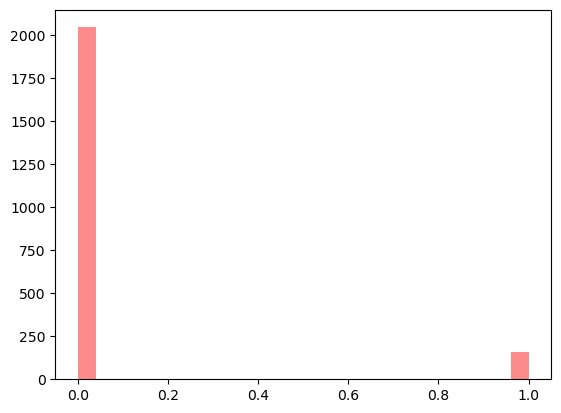

In [45]:
plt.hist(ifood_data['AcceptedCmp5'], bins=25, alpha=0.45, color='red')

(array([1872.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  333.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

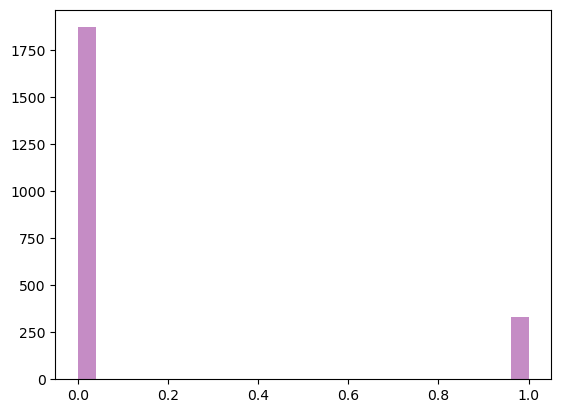

In [46]:
plt.hist(ifood_data['Response'], bins=25, alpha=0.45, color='purple')

In [47]:
#find way to show histograms of all these 6 campaigns side by side for the above

In [49]:
#other things to consider: (1) rework/reexamine entrie project to check that that data i closely exmined wil answer the 
#problem ID questions (2) look into heatmaps and other methods to uncover trends and things that help with answer problem 
#was addressed (3) brain storm and write out another 5 ways to extract more insights based on solving the problems defined 
#in project and getting greater access and understanding of project  

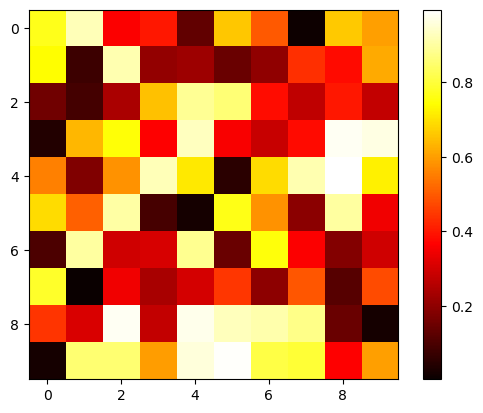

In [50]:
#plotted different heatmaps but am unsure how they need to look and how to interpret them
ifood_data = np.random.rand(10, 10)
plt.imshow(ifood_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

<Axes: >

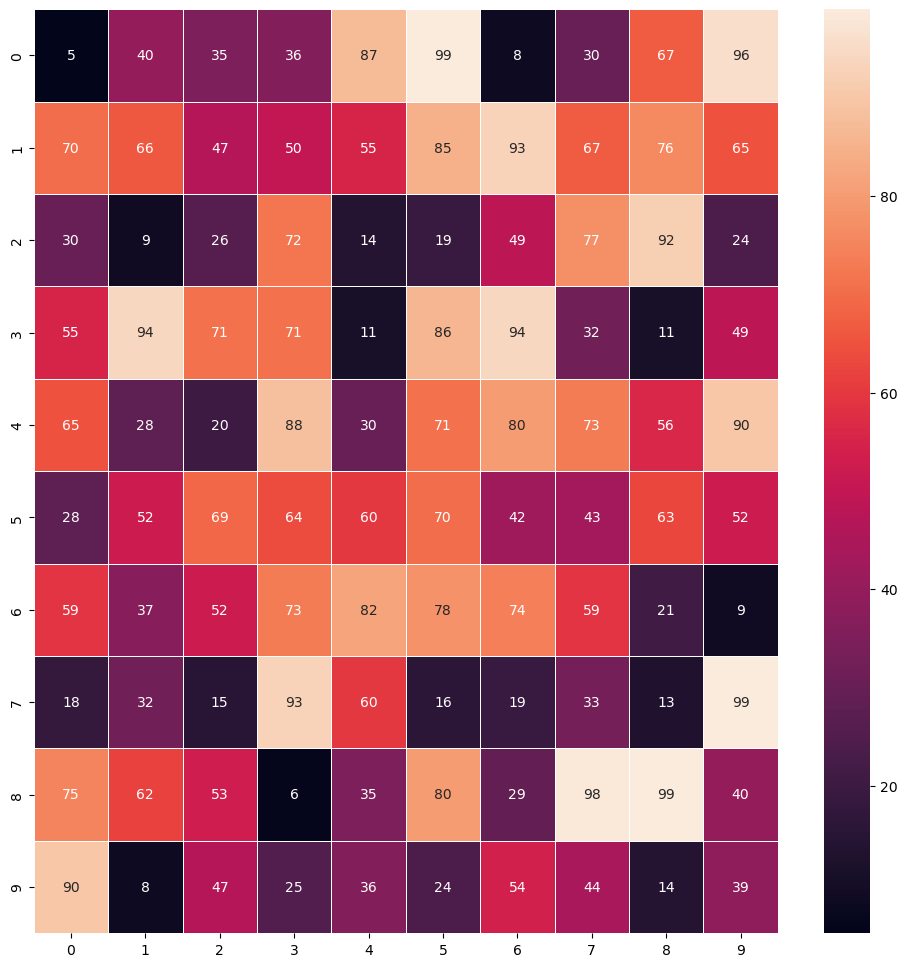

In [59]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(ifood_data, annot= True, ax=ax, linewidths=0.6)

<Axes: >

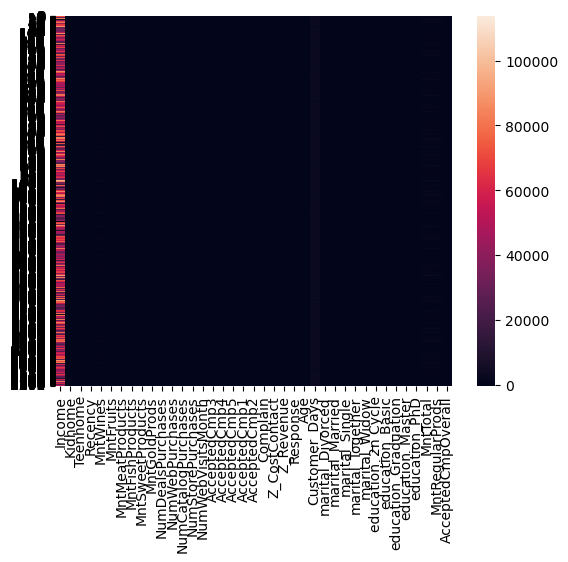

In [52]:
sns.heatmap(ifood_data, xticklabels=True, yticklabels=True)

In [59]:
#did a correltions but when running code over again output says error so unsure how to pull it back up and why code 
#worked at first then stopped 
correlations = ifood_data.corr(method='pearson')
# Correlation Between All The Features
print(correlations)

                        Income   Kidhome  Teenhome   Recency  MntWines  \
Income                1.000000 -0.531699  0.042483  0.006716  0.730495   
Kidhome              -0.531699  1.000000 -0.040207  0.011829 -0.499288   
Teenhome              0.042483 -0.040207  1.000000  0.013881  0.002783   
Recency               0.006716  0.011829  0.013881  1.000000  0.016470   
MntWines              0.730495 -0.499288  0.002783  0.016470  1.000000   
MntFruits             0.537920 -0.374388 -0.176925 -0.004909  0.384947   
MntMeatProducts       0.702500 -0.445665 -0.267177  0.026138  0.593119   
MntFishProducts       0.551758 -0.389895 -0.206371  0.001177  0.395967   
MntSweetProducts      0.555601 -0.379101 -0.164246  0.025535  0.388613   
MntGoldProds          0.417653 -0.356550 -0.019619  0.018558  0.390194   
NumDealsPurchases    -0.132427  0.226434  0.394341  0.000479  0.011858   
NumWebPurchases       0.503184 -0.375590  0.161229 -0.005104  0.552342   
NumCatalogPurchases   0.710057 -0.5198

In [61]:
print(correlations["Income"]["AcceptedCmp1"])

0.3452420616978149


<Axes: xlabel='Income', ylabel='AcceptedCmp1'>

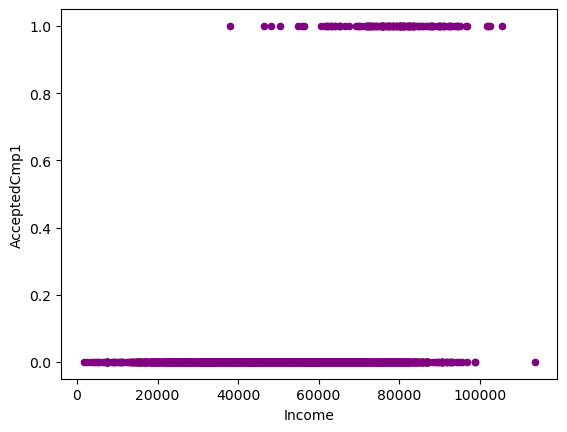

In [63]:
#how do i know which column to plot on x and y axix, i did both but need to choose one, also plotted the income over the
#first campaign but these outputs also say error after already giving me a output. Regardless this income here is 
#all the customers not just the ones that are $50k+ must find out how to do that 
ifood_data.plot.scatter(x='Income', y='AcceptedCmp1', c='purple')


<Axes: xlabel='AcceptedCmp1', ylabel='Income'>

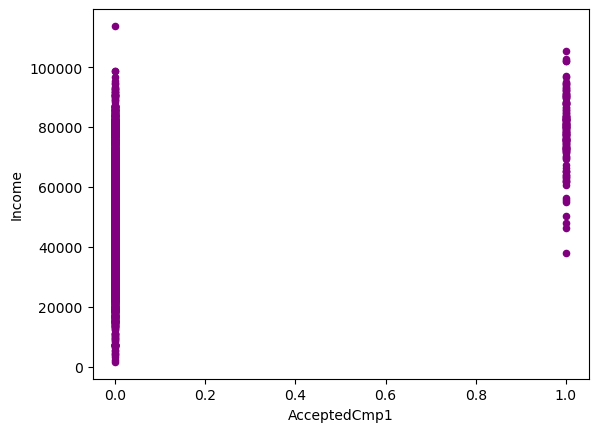

In [64]:
ifood_data.plot.scatter(x='AcceptedCmp1', y='Income', c='purple')


In [62]:
print(correlations["Income"]["Response"])

0.1749017657049621


<Axes: xlabel='Income', ylabel='Response'>

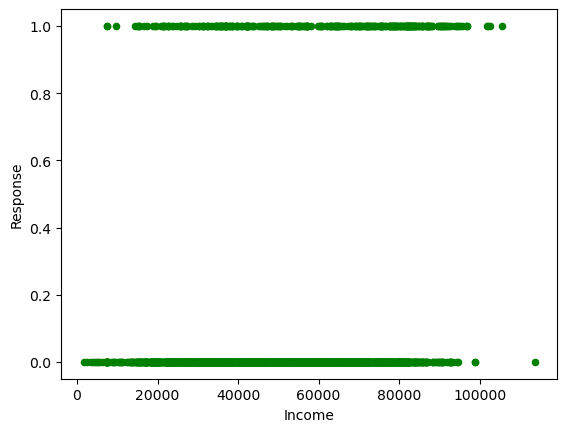

In [65]:
ifood_data.plot.scatter(x='Income', y='Response', c='green')


<Axes: xlabel='Response', ylabel='Income'>

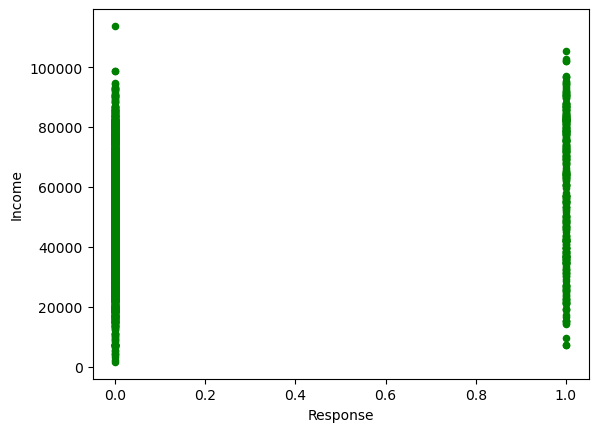

In [66]:
ifood_data.plot.scatter(x='Response', y='Income', c='green')


In [71]:
kMeans = KMeans(n_clusters=2)
kMeans.fit(ifood_data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

NameError: name 'KMeans' is not defined